In [6]:
from tensorflow.keras.datasets import imdb
import numpy as np

# data loading (most frequent 10k words only)
(train_data, train_lables), (test_data, test_lables) = imdb.load_data(num_words=10000)

# word & index dictionary mapping
word_index = imdb.get_word_index() # type = dict

# reversed dictionary mapping
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decoding the review
# 0 -> padding, 1 -> starts of sequence, 2 -> unknown
decoded_review = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])

In [7]:
# Vectorizing function (for One-Hot Encoding)
# Transform a review to a vector data
def vectorize_sequences(sequences, dimension=10000):
    # initializing the storing space
    # Zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        # set specific indices of results[i] to 1
        results[i, sequences] = 1

    return results

# plot_loss & plot_acc definition
import matplotlib.pyplot as plt

def plot_acc(h, title='accuracy'):
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc=0)

def plot_loss(h, title='loss'):
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc=0)

In [8]:
# Vectorize
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# re-format the data type (float data type as an inputs of MLP)
# y = positive(1) of negative(0)
y_train =np.asarray(train_lables).astype("float32")
y_test =np.asarray(test_lables).astype("float32")

In [9]:
# Modeling
from tensorflow.keras import models, layers
from tensorflow.keras import optimizers, losses, metrics

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # output is 0 or 1


# model.complie(optimizer='rmsprop', loss='binary_crossentropy',
#               metrics=['accuracy'])

# customizing learning rate
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy',
              metrics=['accuracy'])

/Users/hsyoon/miniforge3/envs/tf/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [10]:
# test validation split (10000 examples)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
# model learning
history = model.fit(partial_x_train, partial_y_train, 
                    epochs=20, batch_size=512, validation_data=(x_val, y_val))

# model evaluation
results = model.evaluate(x_test, y_test)
print(results)

# model prediction
model.predict(x_test)

Epoch 1/20


2023-04-09 05:38:41.636437: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-09 05:38:41.831585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.4891 - accuracy: 0.7966

2023-04-09 05:38:44.033929: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 3s 48ms/step - loss: 0.4891 - accuracy: 0.7966 - val_loss: 0.3652 - val_accuracy: 0.8732
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2862 - accuracy: 0.9075 - val_loss: 0.3014 - val_accuracy: 0.8840
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2132 - accuracy: 0.9285 - val_loss: 0.3073 - val_accuracy: 0.8745
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1718 - accuracy: 0.9420 - val_loss: 0.2776 - val_accuracy: 0.8872
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1362 - accuracy: 0.9583 - val_loss: 0.3117 - val_accuracy: 0.8805
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1153 - accuracy: 0.9626 - val_loss: 0.3452 - val_accuracy: 0.8695
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0932 - accuracy: 0.9729 - val_loss: 0.3163 - val_accuracy: 0.8833
Epoch 8/20
30/30 [======

2023-04-09 05:38:59.270847: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 2s 2ms/step


array([[0.00257099],
       [0.99999976],
       [0.97534686],
       ...,
       [0.00186859],
       [0.01506229],
       [0.5742699 ]], dtype=float32)

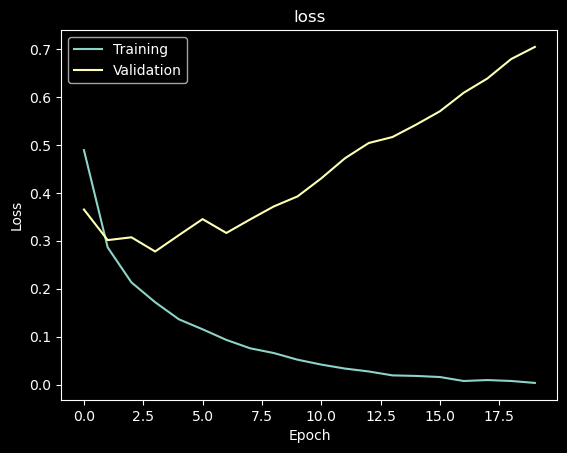

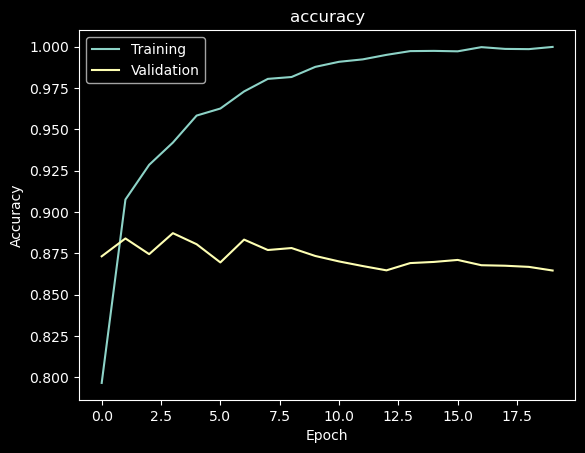

<Figure size 640x480 with 0 Axes>

In [12]:
# visualization
plot_loss(history)
plt.show()
# plt.savefig('chapter2-1.loss.png')

plt.clf()
plot_acc(history)
plt.show()
# plt.savefig('chapter2-1.accuracy.png')
plt.clf()

Epoch 1/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0036 - accuracy: 0.9992 - val_loss: 1.2058 - val_accuracy: 0.8547
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 1.5132e-04 - accuracy: 1.0000 - val_loss: 1.1666 - val_accuracy: 0.8600
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 7.8847e-05 - accuracy: 1.0000 - val_loss: 1.1814 - val_accuracy: 0.8584


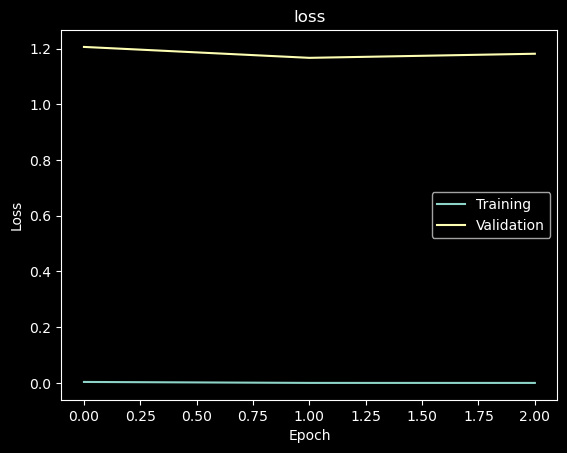

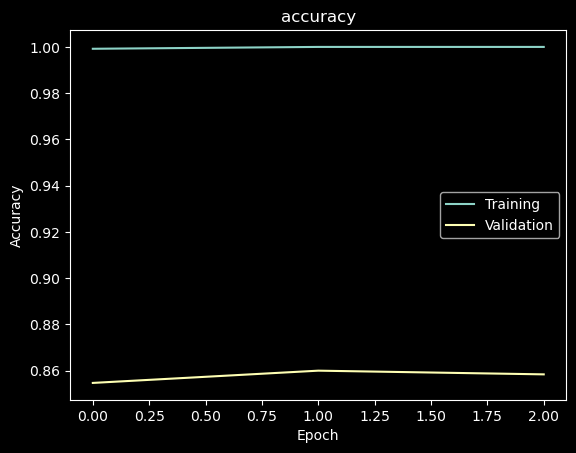

<Figure size 640x480 with 0 Axes>

In [19]:
# early stopping

from tensorflow.keras.callbacks import EarlyStopping

history = model.fit(partial_x_train, partial_y_train, 
                    epochs=20, batch_size=512, validation_data=(x_val, y_val), 
                    callbacks = [EarlyStopping(monitor='val_loss', patience=1)])

# visualization
plot_loss(history)
plt.show()
# plt.savefig('chapter2-1.loss.png')

plt.clf()
plot_acc(history)
plt.show()
# plt.savefig('chapter2-1.accuracy.png')
plt.clf()
